In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
#Q1
#Exercise 2.5

In [3]:
#Stationary setting, Action Value Estimate: Sample average
def Bandit(k, ep = 0.1, m = 100):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9) #initial action
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k) #q* distribution
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
    return Avg_rew, Optimal

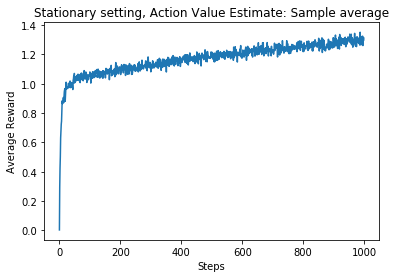

In [4]:
#Plotting avg reward graph
a = []
b = []
for i in range(2000):
    avg, opt = Bandit(10, 0.01, 1000)
    a.append(avg)
    b.append(opt)

avg1 = np.mean(a, axis = 0)
plt.plot(avg1)
plt.xlabel('Steps') 
plt.ylabel('Average Reward') 
plt.title('Stationary setting, Action Value Estimate: Sample average')
plt.show()



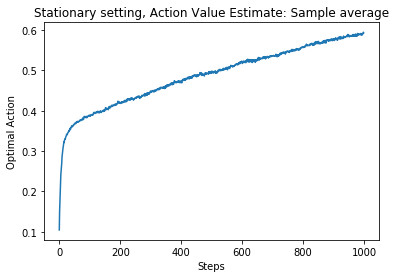

In [5]:
#Plotting optimal percentage graph
avg2 = np.mean(b, axis = 0)
plt.plot(avg2)
plt.xlabel('Steps') 
plt.ylabel('Optimal Action') 
plt.title('Stationary setting, Action Value Estimate: Sample average')
plt.show()

In [6]:
# Non-stationary setting, action-value estimates: sample averages
def BanditNSa(k, ep = 0.1, m = 100):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        Q_addition = np.random.normal(0, 0.01, k)
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        
    return Avg_rew, Optimal

In [7]:
# non-stationary setting, action-value estimates: constant step
def BanditNSc(k, ep = 0.1, m = 100, alpha = 0.1):
    Avg_rew = []
    Optimal = []
    opt = 0
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, total)[random.randint(0, total - 1)]
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + alpha*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
           
    return Avg_rew, Optimal

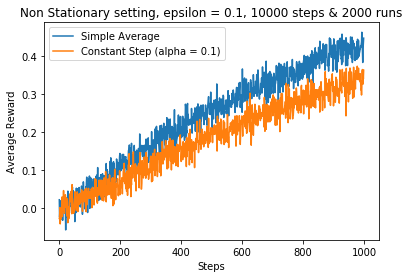

In [8]:
#Plotting avg reward graph
alpha = 0.1
Sa = []
Sb = []
Ca = []
Cb = []
for i in range(2000):
    avgs, opts = BanditNSa(10, 0.1, 1000)
    Sa.append(avgs)
    Sb.append(opts)
    avgc, optc = BanditNSc(10, 0.1, 1000, alpha)
    Ca.append(avgc)
    Cb.append(optc)

    
avg1 = np.mean(Sa, axis = 0)
avg2 = np.mean(Ca, axis = 0)
plt.plot(avg1, label = 'Simple Average')
plt.plot(avg2, label = 'Constant Step (alpha = 0.1)')
plt.xlabel('Steps') 
plt.ylabel('Average Reward') 
plt.title('Non Stationary setting, epsilon = 0.1, 10000 steps & 2000 runs')
plt.legend()
plt.show()

          

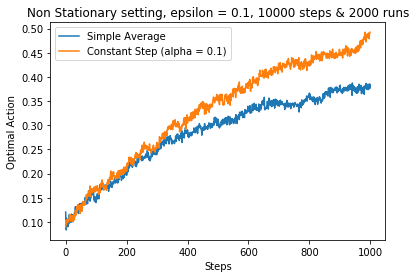

In [9]:
#Plotting optimal percentage graph
avg1 = np.mean(Sb, axis = 0)
avg2 = np.mean(Cb, axis = 0)
plt.plot(avg1, label = 'Simple Average')
plt.plot(avg2, label = 'Constant Step (alpha = 0.1)')
plt.xlabel('Steps') 
plt.ylabel('Optimal Action') 
plt.title('Non Stationary setting, epsilon = 0.1, 10000 steps & 2000 runs')
plt.legend()
plt.show()